<a href="https://colab.research.google.com/github/venkateshsureshcks/Car_prediction/blob/main/car_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

path = '/content/cars24-car-price.csv'
df = pd.read_csv(path)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [ ]:
df['selling_price'].min()

0.3

In [ ]:
df.isnull().sum()

,0
selling_price,0
year,0
km_driven,0
mileage,0
engine,0
max_power,0
age,0
make,0
model,0
Individual,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  float64
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  float64
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  float64
 7   make              19820 non-null  object 
 8   model             19820 non-null  object 
 9   Individual        19820 non-null  int64  
 10  Trustmark Dealer  19820 non-null  int64  
 11  Diesel            19820 non-null  int64  
 12  Electric          19820 non-null  int64  
 13  LPG               19820 non-null  int64  
 14  Petrol            19820 non-null  int64  
 15  Manual            19820 non-null  int64  
 16  5                 19820 non-null  int64 

In [ ]:
df.columns

Index(['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power',
       'age', 'make', 'model', 'Individual', 'Trustmark Dealer', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'Manual', '5', '>5'],
      dtype='object')

In [ ]:
num_cols = df.select_dtypes(include=['number', 'float'])
for i in num_cols:
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df[i] = np.where(df[i] < lower_bound, lower_bound, df[i])
  df[i] = np.where(df[i] > upper_bound, upper_bound, df[i])


In [ ]:
df.isnull().sum()

,0
selling_price,0
year,0
km_driven,0
mileage,0
engine,0
max_power,0
age,0
make,0
model,0
Individual,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))
print(df[col])
df['make']

Index(['make', 'model'], dtype='object')
0         193
1        1283
2        1428
3         175
4         920
         ... 
19815    2009
19816    1010
19817    2128
19818    3143
19819     638
Name: model, Length: 19820, dtype: int64


,make
0,22
1,13
2,13
3,22
4,11
...,...
19815,38
19816,22
19817,36
19818,21


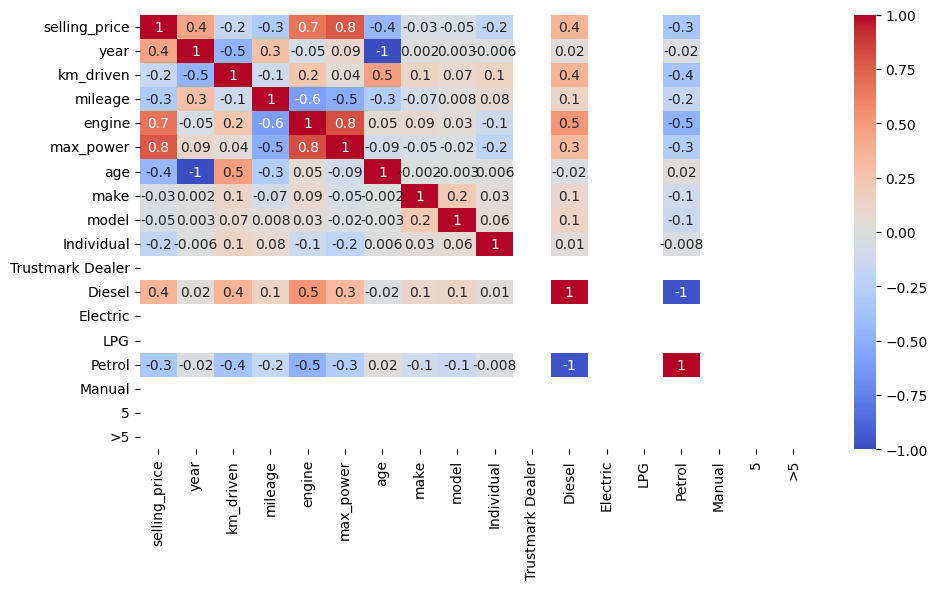

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot = True, cmap = 'coolwarm', fmt='0.1g')
plt.tight_layout()
plt.show()

In [ ]:
cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power',
       'age', 'make', 'model', 'Individual', 'Trustmark Dealer', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'Manual', '5', '>5']

X = []
for i in cols:
    corrr = df['selling_price'].corr(df[i])
    if corrr >= 0.2 or corrr <= -0.2:
        X.append(i)
        print(f'{i} → correlation: {corrr:.2f}')
print(X)



year → correlation: 0.45
mileage → correlation: -0.31
engine → correlation: 0.66
max_power → correlation: 0.77
age → correlation: -0.45
Individual → correlation: -0.20
Diesel → correlation: 0.36
Petrol → correlation: -0.33
['year', 'mileage', 'engine', 'max_power', 'age', 'Individual', 'Diesel', 'Petrol']


In [ ]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000.0,19.70,796.0,46.30,11.0,22,193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,5.50,2016.0,20000.0,18.90,1197.0,82.00,7.0,13,1283,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,2.15,2010.0,60000.0,17.00,1197.0,80.00,13.0,13,1428,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,2.26,2012.0,37000.0,20.92,998.0,67.10,11.0,22,175,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,5.70,2015.0,30000.0,22.77,1498.0,98.59,8.0,11,920,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [2,5,10]}

x = df[['year', 'mileage', 'engine', 'max_power', 'age', 'Diesel', 'Petrol']]

y = df[['selling_price']]

feature_scaler = StandardScaler()
target_scaler = StandardScaler()

# Fit and transform
X_scaled = feature_scaler.fit_transform(x)
y_scaled = target_scaler.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 42)
model = RandomForestRegressor()

r_cv = RandomizedSearchCV(estimator = model, param_distributions = params, n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = -1)
r_cv.fit(X_train, y_train)
best_params = r_cv.best_params_
best_model = r_cv.best_estimator_
y_pred = best_model.predict(X_test)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
print(best_params)
print(best_model)
best_score = r_cv.best_score_
print(best_score)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
RandomForestRegressor(min_samples_leaf=2)
0.9187614206937773
0.07034442952547423
0.930284782281324


In [ ]:
for col in cat_cols:
    df[col] = le.inverse_transform(df[col])



In [ ]:
print(num_cols)

       selling_price    year  km_driven  mileage  engine  max_power   age  \
0               1.20  2012.0     120000    19.70   796.0      46.30  11.0   
1               5.50  2016.0      20000    18.90  1197.0      82.00   7.0   
2               2.15  2010.0      60000    17.00  1197.0      80.00  13.0   
3               2.26  2012.0      37000    20.92   998.0      67.10  11.0   
4               5.70  2015.0      30000    22.77  1498.0      98.59   8.0   
...              ...     ...        ...      ...     ...        ...   ...   
19815           6.50  2017.0      69480    23.59  1364.0      67.05   6.0   
19816           9.25  2019.0      18000    17.50  1373.0      91.10   4.0   
19817           4.25  2015.0      67000    21.14  1498.0     103.52   8.0   
19818          12.25  2016.0    3800000    16.00  2179.0     140.00   7.0   
19819          12.00  2019.0      13000    18.00  1497.0     117.60   4.0   

       Individual  Trustmark Dealer  Diesel  Electric  LPG  Petrol  Manual 

In [ ]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000.0,19.70,796.0,46.30,11.0,3 SERIES 320I,ALTO STD,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,5.50,2016.0,20000.0,18.90,1197.0,82.00,7.0,3 SERIES 320D HIGHLINE,GRAND I10 ASTA,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,2.15,2010.0,60000.0,17.00,1197.0,80.00,13.0,3 SERIES 320D HIGHLINE,I20 ASTA,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,2.26,2012.0,37000.0,20.92,998.0,67.10,11.0,3 SERIES 320I,ALTO K10 2010-2014 VXI,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,5.70,2015.0,30000.0,22.77,1498.0,98.59,8.0,3 SERIES 320D GT LUXURY LINE,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
import pickle

with open('Car_predict.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [ ]:
pickle.dump(feature_scaler, open("feature_scaler.pkl", "wb"))
pickle.dump(target_scaler, open("target_scaler.pkl", "wb"))